## Experimental results by train & test size using Dimension Reduction

학습 데이터 및 테스트 사이즈에 따른 실험 결과

<span style="color: #2D3748; background-color:#fff5b1;">테스트 사이즈가 점점 증가하고 학습 데이터가 점점 감소하는 경우 정확도는 감소한다. 하지만 분류 시간의 경우 학습 데이터와 테스트 데이터의 비율에 따라 증가하다가 감소한다. PCA를 적용하지 않은 방법과 유사한 형태의 실험 결과를 보여준다.</span>

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## kNN with PCA feature 3

In [2]:
comparison_test = []
comparison_time = []

test_acc = []
train_time = []

wine = load_wine()

pca = PCA(n_components=3)
features = pca.fit(wine.data).transform(wine.data)
target = wine.target
target_names = wine.target_names

### Test Size 10%

Train size :  160  / Test size :  18


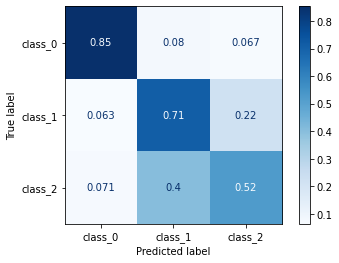

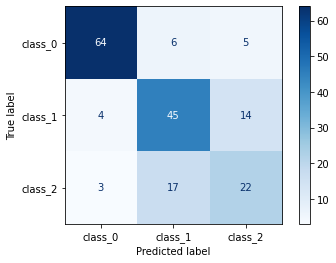

In [3]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))
test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 20%

Train size :  142  / Test size :  36


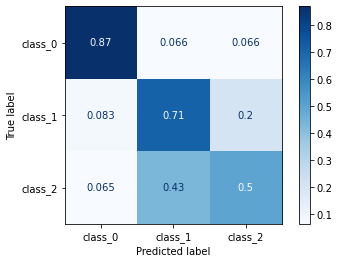

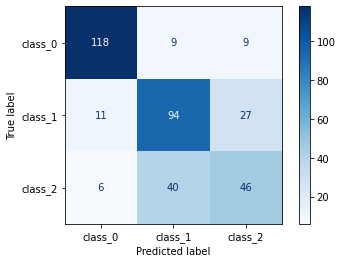

In [4]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 30%

Train size :  124  / Test size :  54


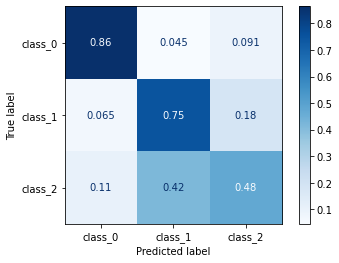

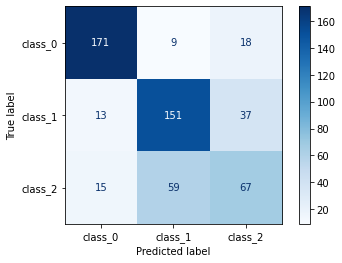

In [5]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 40%

Train size :  106  / Test size :  72


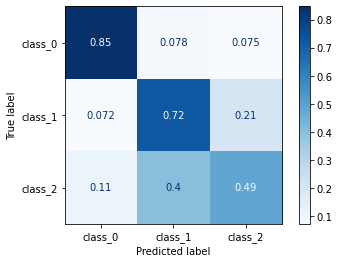

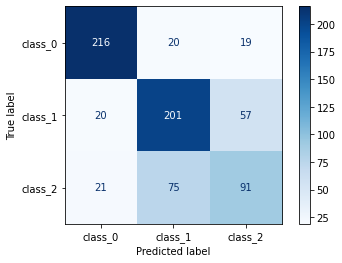

In [6]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):


    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 50%

Train size :  89  / Test size :  89


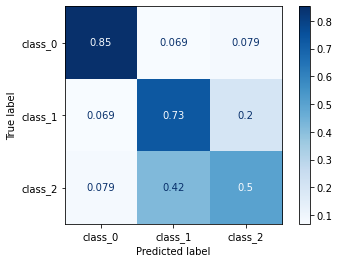

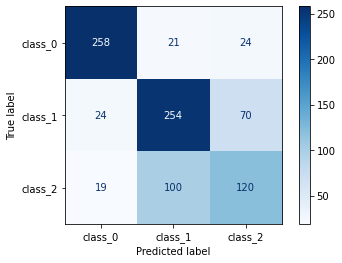

In [7]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 60%

Train size :  71  / Test size :  107


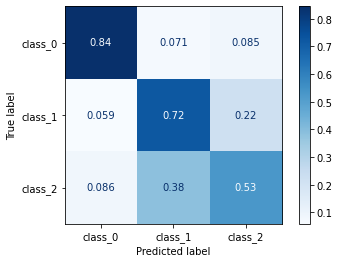

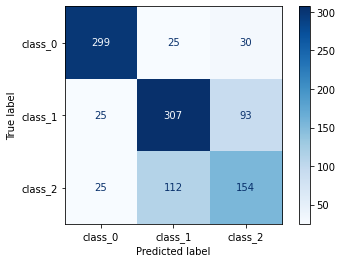

In [8]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 70%

Train size :  53  / Test size :  125


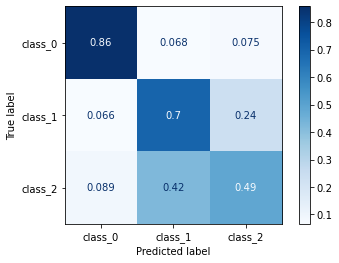

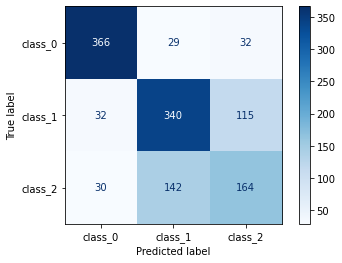

In [9]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.7, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 80%

Train size :  35  / Test size :  143


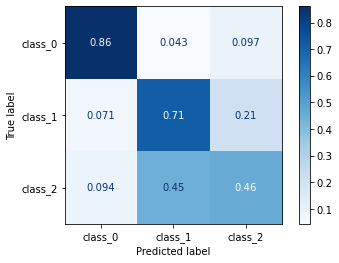

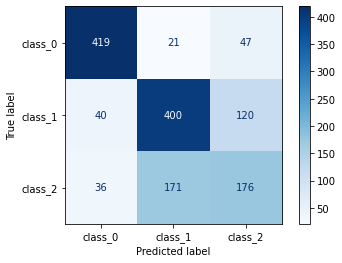

In [10]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 90%

Train size :  17  / Test size :  161


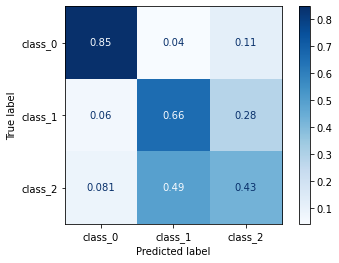

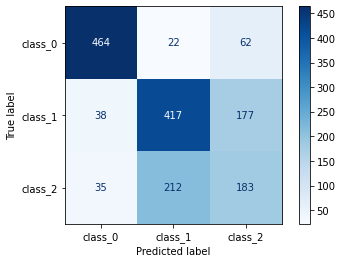

In [11]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.9, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

comparison_test.append(test_acc)
comparison_time.append(train_time)

### Experiment Result

<Figure size 864x648 with 0 Axes>

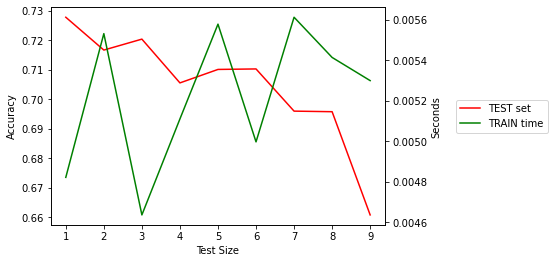

In [12]:
plt.figure(figsize=(12, 9))

fig, ax1 = plt.subplots()
ax1.set_xlabel("Test Size")
ax1.set_ylabel("Accuracy")
line1 = ax1.plot(range(1, 10), test_acc, label='TEST set', color='red')

ax2 = ax1.twinx()
ax2.set_ylabel("Seconds")
line2 = ax2.plot(range(1, 10), train_time, label='TRAIN time', color='green')

lines = line1 + line2

labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()

## kNN with PCA feature 2

In [13]:
test_acc = []
train_time = []

wine = load_wine()

pca = PCA(n_components=2)
features = pca.fit(wine.data).transform(wine.data)
target = wine.target
target_names = wine.target_names

### Test Size 10%

Train size :  160  / Test size :  18


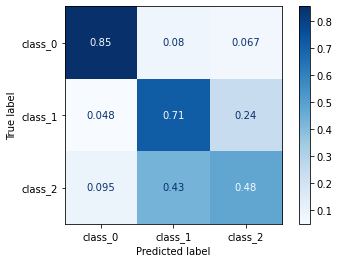

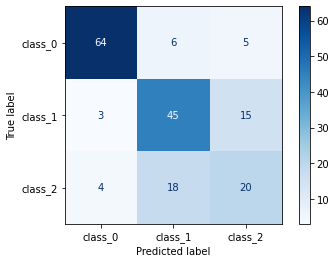

In [14]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))
test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 20%

Train size :  142  / Test size :  36


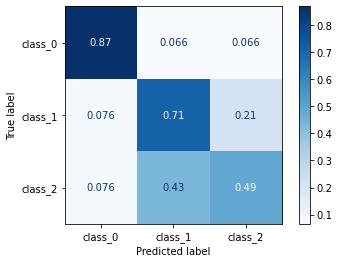

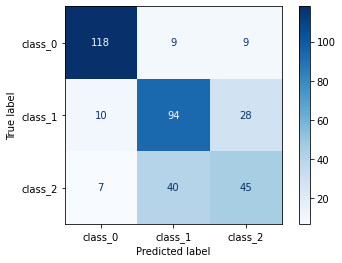

In [15]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 30%

Train size :  124  / Test size :  54


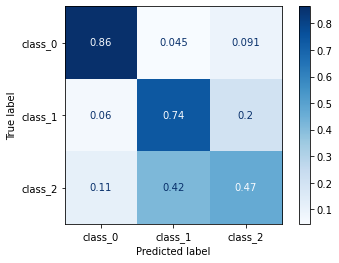

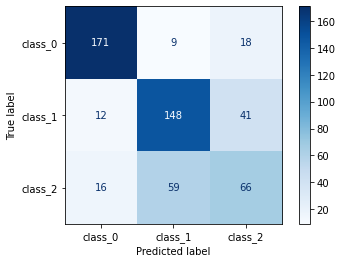

In [16]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 40%

In [1]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):


    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

NameError: name 'train_test_split' is not defined

### Test Size 50%

Train size :  89  / Test size :  89


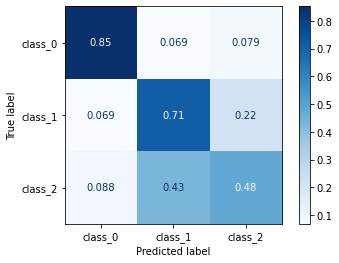

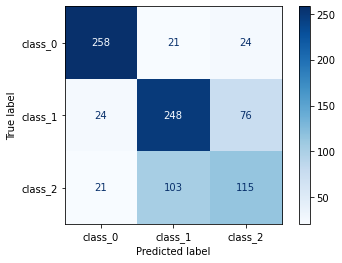

In [18]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 60%

Train size :  71  / Test size :  107


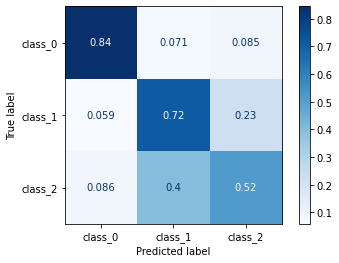

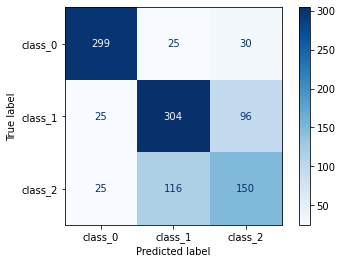

In [19]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.6, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 70%

Train size :  53  / Test size :  125


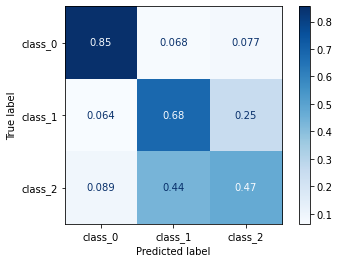

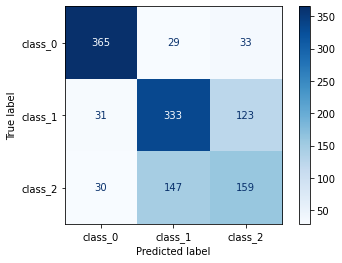

In [20]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.7, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 80%

Train size :  35  / Test size :  143


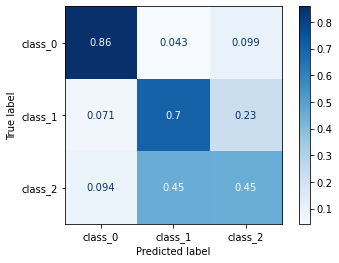

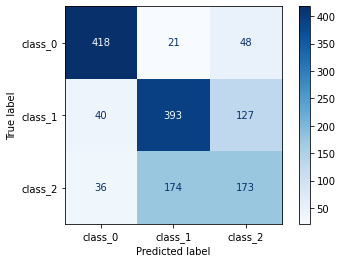

In [21]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

### Test Size 90%

In [3]:
max_seed = 10

avg_test_acc = []
avg_time = []

predict_list = []
label_list = []

for seed in range(max_seed):

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.9, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("Train size : ", len(y_train), " / Test size : ", len(y_test))

test_avg = np.array(avg_test_acc).mean()
time_avg = np.array(avg_time).mean()

test_acc.append(test_avg)
train_time.append(time_avg)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

comparison_test.append(test_acc)
comparison_time.append(train_time)

NameError: name 'train_test_split' is not defined

<Figure size 864x648 with 0 Axes>

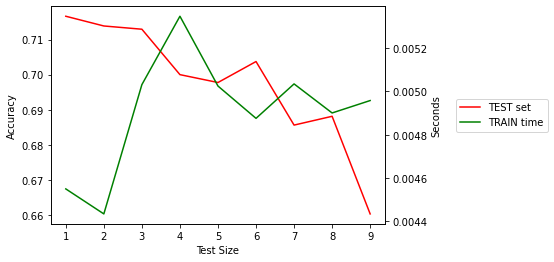

In [23]:
plt.figure(figsize=(12, 9))

fig, ax1 = plt.subplots()
ax1.set_xlabel("Test Size")
ax1.set_ylabel("Accuracy")
line1 = ax1.plot(range(1, 10), test_acc, label='TEST set', color='red')

ax2 = ax1.twinx()
ax2.set_ylabel("Seconds")
line2 = ax2.plot(range(1, 10), train_time, label='TRAIN time', color='green')

lines = line1 + line2

labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()